In [1]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import seaborn


df = pd.read_csv('../data/gedichtenGGD_STCN_Steur.csv', sep=';', index_col=0)
print(df.shape)

(4013, 28)


In [2]:
df.columns

Index(['Jaar', 'Bruidegom', 'Bruid', 'Bruidspaar', 'Drukker', 'Plaats',
       'Auteur1', 'Auteur2', 'Auteur3', 'Auteur4', 'Auteur5', 'Auteur6',
       'Auteur7', 'Auteur8', 'Auteur9', 'Auteur10', 'Auteur11', 'Auteur12',
       'Auteur13', 'Auteur14', 'Auteur15', 'Auteur16', 'Auteur17', 'Auteur18',
       'Auteur19', 'Auteur20', 'Auteur21', 'Auteur22'],
      dtype='object')

In [3]:
df1 = df.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

In [4]:
df1.to_csv('Drukkers.csv', sep='\t')

In [5]:
df2 = df.groupby('Plaats')['Plaats'].count().sort_values(ascending=False)

In [6]:
df2.to_csv('Plaatsen.csv', sep='\t')

In [7]:
for column in df:
    df[column] = df[column].str.strip()

In [8]:
df['Alleauteurs'] = df[df.columns[6:30]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1)

In [9]:
df.head()

,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats,Auteur1,Auteur2,Auteur3,Auteur4,...,Auteur14,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs
0,,,,,,,,,,,,,,,,,,,,,
1,1691,Samuel van der Lanen,Maria Magdalena Meermans,Samuel van der Lanen & Maria Magdalena Meermans,Reinier Leers,Hoorn,Pieter Rabus,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pieter Rabus
2,1738,Jacobus Willemsen,Elizabeth Verwout Noiret,Jacobus Willemsen & Elizabeth Verwout Noiret,Petrus Dathenus,Amsterdam,Pieter de La Ruë,Johannes Plevier,Isaac Schorer,Nicolaus Barkey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pieter de La Ruë, Johannes Plevier, Isaac Scho..."
3,1744,Johan Schorer,Petronella Maria de Beaufort,Johan Schorer & Petronella Maria de Beaufort,Petrus Dathenus,Amsterdam,David Fiers Kappeine,Johan Steengracht,Lucas Frederik Schorer,Petrus Dathenus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"David Fiers Kappeine, Johan Steengracht, Lucas..."
4,1693,Pieter Koolaert,Elizabeth Hoofman,Pieter Koolaert & Elizabeth Hoofman,Lescailje,NaN,Katharina Lescailje,David van Hoogstraten,Joan Pluimer,Hermannus Angelkot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Katharina Lescailje, David van Hoogstraten, Jo..."
5,1702,Herman Lufneu,Anna Amsincq,Herman Lufneu & Anna Amsincq,Barent Bos,Wesel,David van Hoogstraten,Willem Rabus,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"David van Hoogstraten, Willem Rabus"


In [10]:
df3 = df['Alleauteurs'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

In [11]:
df3.to_csv('Alleauteurs.csv', sep='\t')

[]

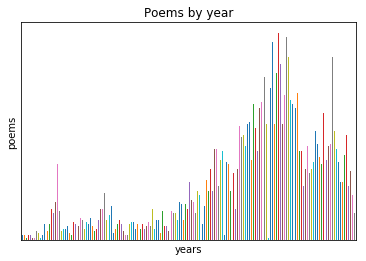

In [26]:
fig1 = df.groupby('Jaar').count()['Bruidspaar'].plot(kind='bar', rot=90)
plt.title('Poems by year')
plt.xlabel('years')
plt.ylabel('poems')
fig1.axes.get_xaxis().set_ticks([])
fig1.axes.get_yaxis().set_ticks([])